In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime

In [3]:
data1 = pd.read_csv("ml_case_training_data.csv")

In [4]:
# count number of customers by counting unique ids
customers = data1['id'].value_counts()
num_unq_customers = len(customers)
print(num_unq_customers)

16096


In [5]:
# Since length of dataframe = length of unique customers, 
# we can infer that each customer id exists only once
# in the dataframe. We can check this further by getting 
# the max of customers, which has the counts of each id.
# If max(customers) = 1, we have ascertained that each 
# customer has one entry in the dataset.

print(max(customers))

1


In [40]:
data1["total_cons_12m"]=data1["cons_12m"]+data1["cons_gas_12m"]
total_cons_12m = data1["total_cons_12m"]
elc_cons_12m = data1["cons_12m"]
gas_cons_12m = data1["cons_gas_12m"]
sub_power = data1["pow_max"]
forecast_cons_12m = data1['forecast_cons_12m']
date_activated=pd.to_datetime(data1['date_activ'])

/Users/samarthgoenka/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in log
  """Entry point for launching an IPython kernel.
/Users/samarthgoenka/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in log
  """Entry point for launching an IPython kernel.
/Users/samarthgoenka/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in log
  
/Users/samarthgoenka/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in log
  


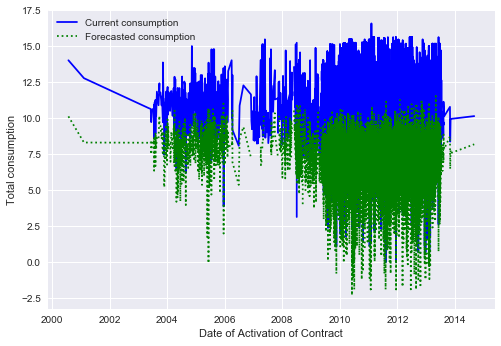

In [57]:
log_curr_cons=np.log(elc_cons_12m)
log_fore_cons=np.log(forecast_cons_12m)

cons_df=pd.DataFrame(
    {'date_activated':date_activated,
     'total_curr_cons':log_curr_cons,
     'total_fore_cons':log_fore_cons})
cons_df.sort_values('date_activated',inplace=True)

plt.plot(cons_df['date_activated'],cons_df['total_curr_cons'],c='b')
plt.plot(cons_df['date_activated'],cons_df['total_fore_cons'],c='g',linestyle=':')
plt.legend(['Current consumption','Forecasted consumption'],loc='upper left')
plt.xlabel('Date of Activation of Contract')
plt.ylabel('Total consumption')
plt.show()

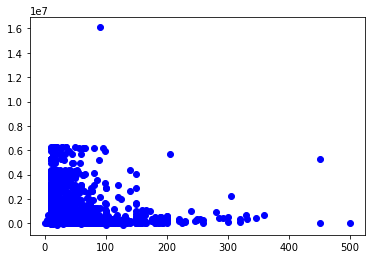

The pearson correlation is 0.10242255835
The kendall correlation is 0.282451956033


In [8]:
# Correlation between subscribed power and total consumption using two different correlation methods

plt.scatter(sub_power,elc_cons_12m,c="blue")
plt.show()

# plt.show(pd.scatter_matrix(corr_data,figsize=(10,10),diagonal="hist"))

# Pearson correlation
pearson_corr=elc_cons_12m.corr(sub_power,method='pearson')
print("The pearson correlation is", pearson_corr)

# Kendall correlation 
kendall_corr=elc_cons_12m.corr(sub_power,method='kendall')
print("The kendall correlation is", kendall_corr)

# This implies that there is a weak positive correlation between the electricity consumption and subscribed power

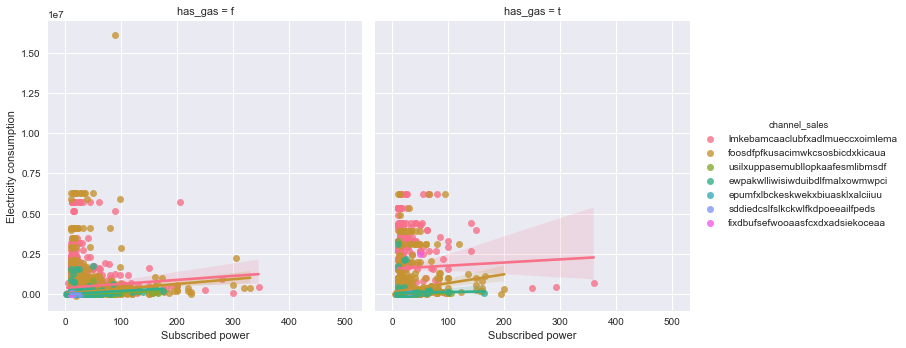

In [9]:
# We can visualize the correlation between the electricity
# consumption and subscribed power separately for customers
# that also have subscriptions for gas and mark them 
# separately by sales channels and the code of the electricity
# campaign the custmoer first subscribed to.

import seaborn as sns
sns.set()

g = sns.lmplot(x="pow_max", y="cons_12m",hue='channel_sales',col='has_gas',scatter=True,
               truncate=True, size=5, data=data1)

plt.show(g.set_axis_labels("Subscribed power", "Electricity consumption"))

# Scatter plot with different markers for different sales channels 

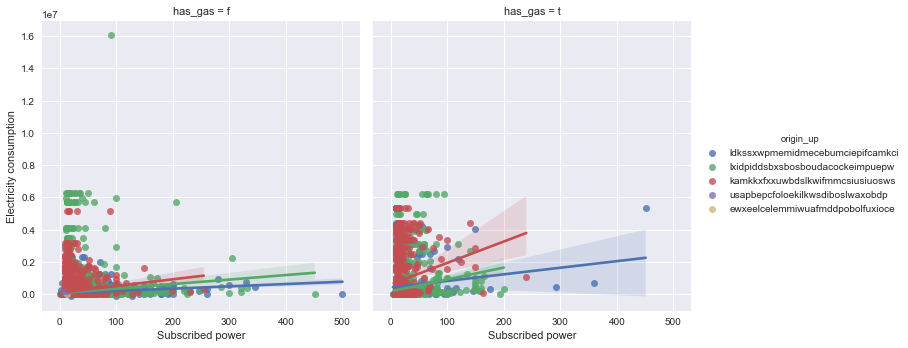

In [10]:
g = sns.lmplot(x="pow_max", y="cons_12m",hue='origin_up',col='has_gas',scatter=True,
               truncate=True, size=5, data=data1)

plt.show(g.set_axis_labels("Subscribed power", "Electricity consumption"))

# Scatter plot with different markers for different electricity campaigns